# Finding Bohr Energies in Hydrogen

We can use the 'wag the dog' method to find Bohr energies in the Hydrogen atom. From the book, we know that

$$
\frac{d^2u}{d\rho^2} = \left[ 1-\frac{\rho_0}{\rho}+\frac{l(l+1)}{\rho^2} \right] u
$$

Let's let 

$$
\rho_0 = 2n
$$

Then we can find the discrete energy levels using the 'wag the dog' method. We'll do it for 3 discrete $n$ for each $l \in \{0,1,2\}$

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def wag_the_dog(x_range=(0.0000001,25), n_values=np.linspace(0.9, 1.1, 10), initial_values=(1.,0.), l=0):
    positions = np.linspace(x_range[0], x_range[1], 1000)
    plt.figure(figsize=(24,8))

    for n_value in n_values:  
        # Differential equation
        psi_prime = lambda rho, psi, n: [psi[1], (1-(2*n/(rho)) + (l*(l+1)/(rho**2)))*psi[0]]

        # Solve differential equation using scipy
        sol = solve_ivp(psi_prime, x_range, initial_values, t_eval=positions, args=[n_value])

        # Plot solution
        plt.plot(positions, sol.y[0], label=fr'$n$: {n_value:.4f}, $l$: {l}')

    # Plotting configuration
    plt.legend()
    plt.axhline(c='black')
    plt.xlabel(r'$\rho$')
    plt.ylabel(r'$u_n(\rho)$')
    plt.ylim(-5,5)
    plt.title(r"Wavefunctions $\Psi_n(x)$ of Griffith's 'Wag-the-dog' Method for Finding Three n Values")
    plt.show()

# Visualization
for $l=0$:

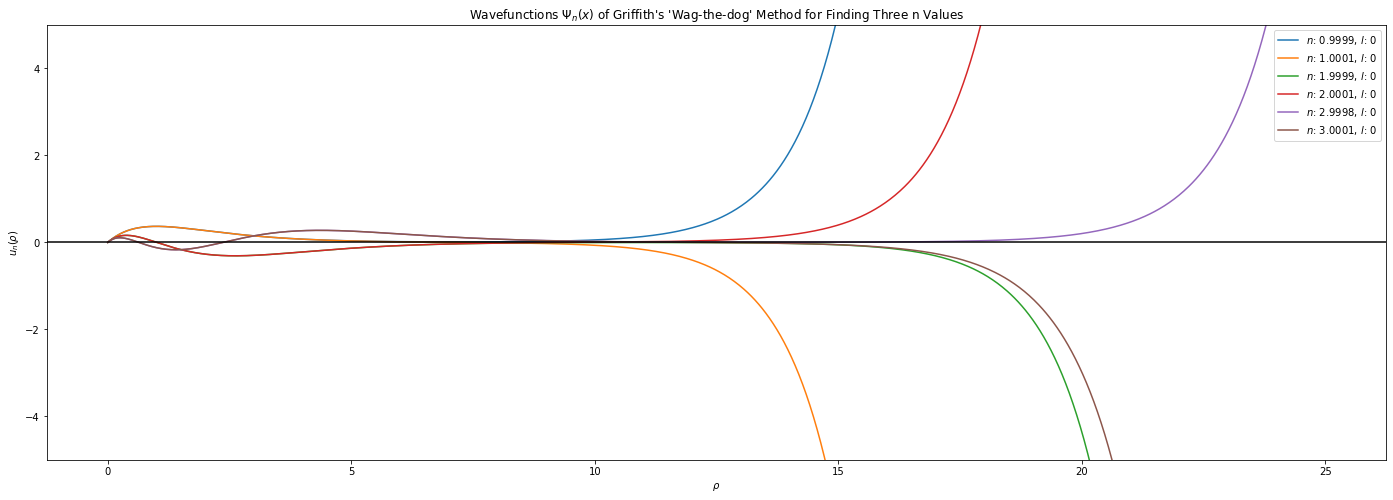

In [4]:
wag_the_dog(initial_values=(0., 1.), n_values=[0.9999, 1.0001, 1.9999, 2.0001, 2.9998, 3.0001], l=0)

for $l=1$, our initial value problem becomes a boundary value problem. This is due to $u(1)=1, u'(0)=0$

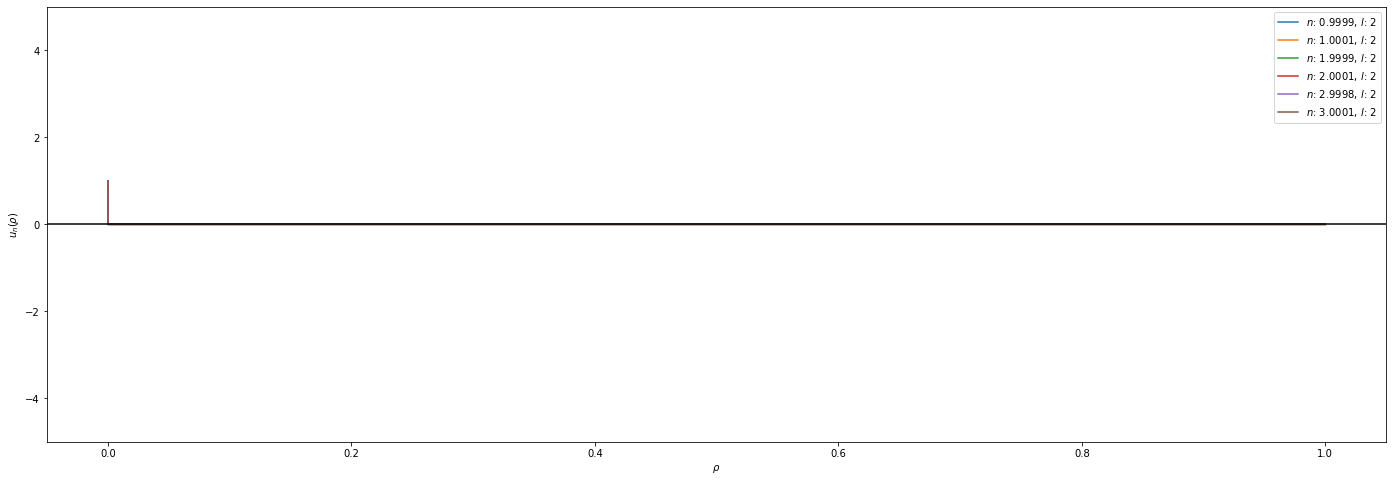

In [230]:
from scipy.integrate import solve_bvp
def wag_the_dog2(x_range=(0.0000001,25), n_values=np.linspace(0.9, 1.1, 10), initial_u=1., initial_up=0., l=0):
    positions = np.linspace(x_range[0], x_range[1], 1000)
    plt.figure(figsize=(24,8))

    for n_value in n_values:  
        # Differential equation
        u_pp = lambda rho, u: [u[1], (1 - (2*n_value/(rho)) + (l*(l+1)/(rho**2)))*u[0]]
        bc   = lambda u1, u2: [u1[0]-initial_u, u2[0]-initial_up]

        sol = solve_bvp(u_pp, bc, [0.0000001, 1.], [[0.,0.],[1.,0.]])

        # Plot solution
        plt.plot(sol.x, sol.y[0], label=fr'$n$: {n_value:.4f}, $l$: {l}')

    # Plotting configuration
    plt.legend()
    plt.axhline(c='black')
    plt.xlabel(r'$\rho$')
    plt.ylabel(r'$u_n(\rho)$')
    plt.ylim(-5,5)
    plt.show()

wag_the_dog2(x_range=(1,25), n_values=[0.9999, 1.0001, 1.9999, 2.0001, 2.9998, 3.0001], l=2)

$l=2$


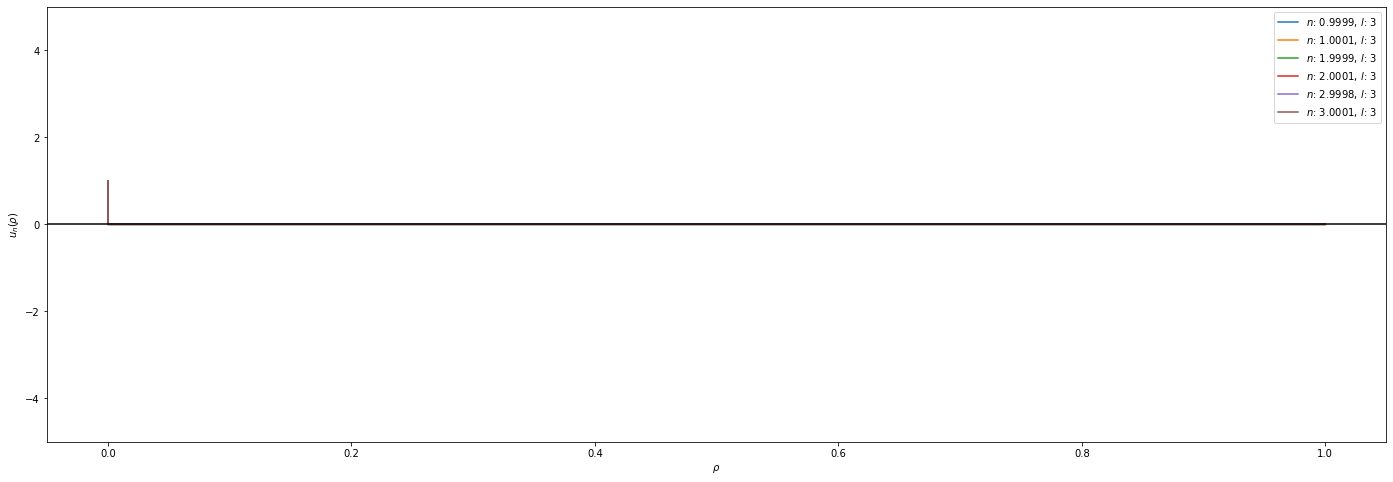

In [235]:
wag_the_dog2(x_range=(1,25), n_values=[0.9999, 1.0001, 1.9999, 2.0001, 2.9998, 3.0001], l=3)